In [1]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..'))

In [2]:
%matplotlib inline

from session.sessions import selected_009266
from imports import *
from loading import load_session_data
from target import get_spike_counts, build_silence_matrix

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [7]:
sessions = [s for s in selected_009266.keys()]
#sessions = [s for s in selected_008229.keys()]
sessions.sort()
sessions

['009266_hippoSIT_2023-04-13_08-57-46',
 '009266_hippoSIT_2023-04-14_09-17-34',
 '009266_hippoSIT_2023-04-17_09-06-10',
 '009266_hippoSIT_2023-04-17_17-04-17',
 '009266_hippoSIT_2023-04-18_10-10-37',
 '009266_hippoSIT_2023-04-18_17-03-10',
 '009266_hippoSIT_2023-04-19_10-33-51',
 '009266_hippoSIT_2023-04-20_08-57-39',
 '009266_hippoSIT_2023-04-20_15-24-14',
 '009266_hippoSIT_2023-04-21_08-43-00',
 '009266_hippoSIT_2023-04-21_13-12-31',
 '009266_hippoSIT_2023-04-24_10-08-11',
 '009266_hippoSIT_2023-04-24_16-56-55',
 '009266_hippoSIT_2023-04-26_08-20-17',
 '009266_hippoSIT_2023-05-02_12-22-14',
 '009266_hippoSIT_2023-05-04_09-11-06',
 '009266_hippoSIT_2023-05-04_19-47-15',
 '009266_hippoSIT_2023-05-22_09-27-22',
 '009266_hippoSIT_2023-05-23_09-18-05',
 '009266_hippoSIT_2023-05-25_15-55-57',
 '009266_hippoSIT_2023-06-14_08-21-23',
 '009266_hippoSIT_2023-06-19_08-58-35']

In [11]:
session = sessions[4]

session_data = load_session_data(session)

tl = session_data['tl']
trials = session_data['trials']
cfg = session_data['cfg']
areas = session_data['areas']
aeps = session_data['aeps']
AEP_metrics_lims = session_data['AEP_metrics_lims']
AEP_metrics_raw = session_data['AEP_metrics_raw']
AEP_metrics_norm = session_data['AEP_metrics_norm']
tgt_matrix = session_data['tgt_matrix']
single_units = session_data['single_units']
spike_times = session_data['spike_times']
unit_names = session_data['unit_names']
animal = session_data['animal']
aeps_file = session_data['aeps_file']
h5_file = session_data['h5_file']
report_path = session_data['report_path']
session

'009266_hippoSIT_2023-04-18_10-10-37'

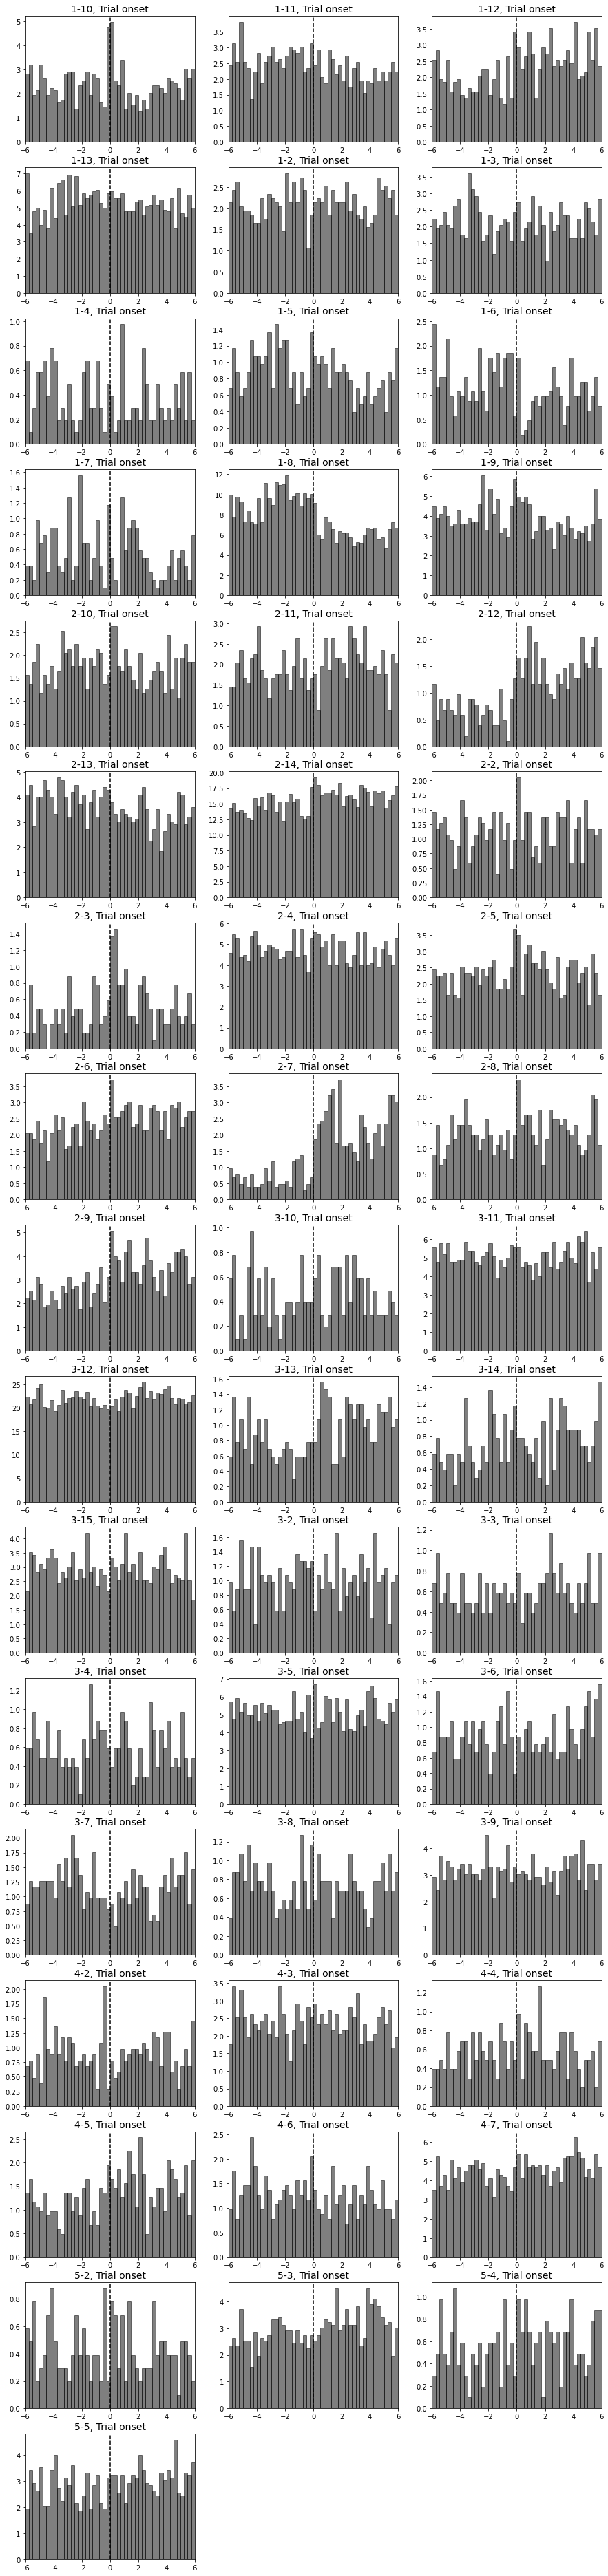

In [12]:
tgt_dur   = cfg['experiment']['target_duration']
hw        = 6
bin_count = 49

# trial onset is always preceeding by at least 10 sec of silence
event_times = tl[trials[:, 0].astype(np.int32)][:, 0]  

cols = 3
rows = int(np.ceil(len(unit_names)/cols))
fig = plt.figure(figsize=(15, rows*4))

for i, unit_name in enumerate(unit_names):
    strain = spike_times[unit_name]

    # compute original
    bins, counts_enter = get_spike_counts(strain, event_times, hw=hw, bin_count=bin_count)

    # get shuffled
    with h5py.File(h5_file, 'r') as f:
        shuffled = np.array(f['units'][unit_name]['psth_shuffled_tgt_onset'])
    
    ax = fig.add_subplot(rows, cols, i+1)
    ax.hist(bins[:-1], bins=bins, weights=counts_enter, edgecolor='black', color='black', alpha=0.5, label='All')
    ax.axvline(0, color='black', ls='--')
    ax.set_title("%s, Trial onset" % unit_name, fontsize=14)
    #ax.axvspan(-tgt_dur, 0, alpha=0.3, color='gray')
    #ax.plot(shuffled[:, 0] - tgt_dur, shuffled[:, 1], lw=2, color='red')
    #ax.plot(shuffled[:, 0] - tgt_dur, shuffled[:, 2], lw=1, color='black')
    #ax.plot(shuffled[:, 0] - tgt_dur, shuffled[:, 3], lw=1, color='black')
    ax.set_xlim(-hw, hw)

#fig.savefig(os.path.join(report_path, 'PSTH_trial_onset.pdf'))